<h1>Unsupervised learning</h1>
<p>
    <img src="../images/MLOverview.jpg" style="width:95%">
</p>
<p>
    De afgelopen colleges zijn supervised learning algoritmes besproken. Hierbij is tijdens het trainen van het model de uitkomst bekend waarna in de toepassing van het getrainde model voorspellingen worden gedaan binnen deze context. Bij unsupervised learning is dit niet het geval, de uitkomst is bij het opbouwen van het model niet bekend.
    <ul>
        <li>Als een supervised algoritme bijvoorbeeld een classificatie probeert te voorspellen, wat probeert een unsupervised algoritme dan te voorspellen?</li>
    </ul>
</p>
<h2>Wat is unsupervised learning?</h2>
<p>
    Unsupervised learning gaat om het vinden van patronen in datasets waar vooraf geen gelabelde data of een bekende uitkomst wordt gebruikt bij het opstellen van een algoritme.
    <ul>
        <li>Als supervised learning bij het opstellen van een algoritme gebruik maakt van gelabelde data of bekende uitkomsten en als unsupervised learning daar juist geen gebruik van maakt om een algoritme op te stellen, wat is dan het verschil kijkende naar doelgerichtheid?
        </li>
        <li>Hoe wordt de effectiviteit van een unsupervised learning algoritme gemeten?</li>
    </ul>
</p>

In [1]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/1qtfILYSDJY', width=700, height=300)

<h2>k-Means clustering</h2>
<p>
    Een van de bekendste unsupervised learning algoritmes is k-Means clustering. Met k-Means clustering wordt een dataset opgedeeld in een vooraf gedefinieerd aantal clusters waarbij de totale afstand (som van elk punt tot het dichtstbij gelegen cluster) van alle datapunten in de dataset wordt geminimaliseerd.
    <ul>
        <li>Wat beschrijft "k" in k-Means clustering?</li>
        <li>Wat is het doel van het minimaliseren van deze afstand?</li>
    </ul>
</p>
<h3>Aannames van k-Means clustering</h3>
<p>
    k-Means clustering is gebaseerd op de volgende 2 aannames:
    <ul>
        <li>"Cluster center" is het gemiddelde van de som van de afstand van elk punt tot het cluster punt</li>
        <li>Een data punt hoort bij een cluster als de afstand van het data punt tot dat cluster kleiner is dan elk ander cluster in de ruimte</li>
    </ul>
    Zie hieronder voorbeeld:
</p>

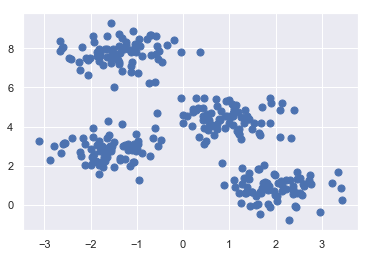

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

<p>
    <ul>
        <li>Zijn deze punten gemakkelijk te clusteren?</li>
        <li>Waar liggen de middelpunten van de clusters?</li>
    </ul>
</p>
<p>
    Via k-Means clustering:
</p>

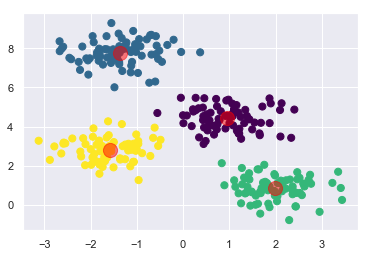

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#Plotten:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

<h2>E-M</h2>
<p>
    Expectation - Maximization is het achterliggende principe van k-Means clustering om tot de best mogelijk cluster verdeling te komen en wordt als volgt beschreven:
    <ol>
        <li>Plaats willekeurig k cluster punten</li>
        <li>Herhaal daarna het volgende:
            <ol>
                <li>(Expectation stap) Wijs de datapunten toe aan het dichtstbij gelegen cluster</li>
                <li>(Maximization stap) Bepaal het cluster center per cluster punt</li>
            </ol>
        </li>
    </ol>
    Om tot de best mogelijke cluster verdeling te komen wordt bovenstaande herhaald zodat bij elke stap het doel is om de totale waarde van het cluster center wordt geminimaliseerd.
    <ul>
        <li>Wanneer stopt bovenstaand proces?</li>
        <li>Is het mogelijk dat bovenstaand proces oneindig doorgaat?</li>
        <li>Resulteert deze methodiek altijd in de meest optimale oplossing (global solution) of kan het ook een minder optimale oplossing vinden (local solution)? Waarom het een of het ander? [Wat kun je hier aan doen?]</li>
    </ul>
</p>
<h2>Bedenkingen bij k-Means clustering</h2>
<p>
    <ul>
        <li>k-Means clustering vereist dat het aantal clusters vooraf wordt bepaald, dus niet dynamisch.
            <ul>
                <li>Wat is hier het nadeel aan?</li>
                <li>Wat is de betekenis van de uitkomst wanneer vooraf het aantal clusters wordt bepaald?</li>
            </ul>
        </li>
        <li>k-Means werkt uitsluitend op lineaire cluster grenzen. Net zoals met SVM, wanneer deze lineaire grenzen geen oplossing mogelijk maken, kan er een kernel functie worden ingezet om de data in een hogere dimensie te projecteren, zie hieronder met behulp van SpectralClustering. SpectralClustering is een k-Means implementatie welke gebruik maakt van een kernel methode:
        </li>
    </ul>
</p>

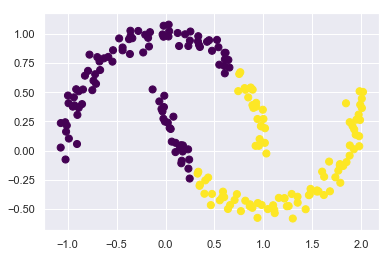

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

C:\localapps\anaconda3_5.1_64\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


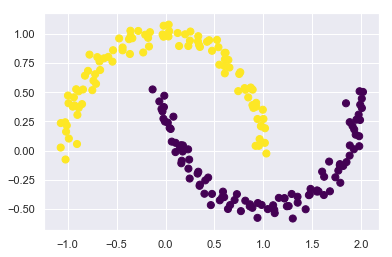

In [9]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');